In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from mass_ratio_plottingFunctions import median_hist, param_hist, param_hist_scatter, param_CDF

# Data

In [2]:
data_directory = '../spirals/'

data_filename = 'DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_noWords_v5.txt'

data = Table.read(data_directory + data_filename, format='ascii.commented_header')

In [3]:
bad_boolean = np.logical_or.reduce([data['M90_map'] == -99, 
                                    data['M90_disk_map'] == -99, 
                                    data['alpha_map'] > 99, 
                                    data['ba_map'] > 0.998])

sample = data[~bad_boolean]

# Calculate additional properties

## Mass ratio

In [4]:
sample['M90_Mdisk_ratio'] = 10**(sample['M90_map'] - sample['M90_disk_map'])
sample['M90_Mdisk_ratio_err'] = sample['M90_Mdisk_ratio']*np.sqrt((sample['M90_disk_err_map']/sample['M90_disk_map'])**2 + 
                                                      (sample['M90_err_map']/sample['M90_map'])**2)

# Separate by environment

In [5]:
vboolean = sample['vflag'] == 1
wboolean = sample['vflag'] == 0

void_gals = sample[vboolean]
wall_gals = sample[wboolean]

# Void galaxy properties

## Mass ratio

<IPython.core.display.Javascript object>


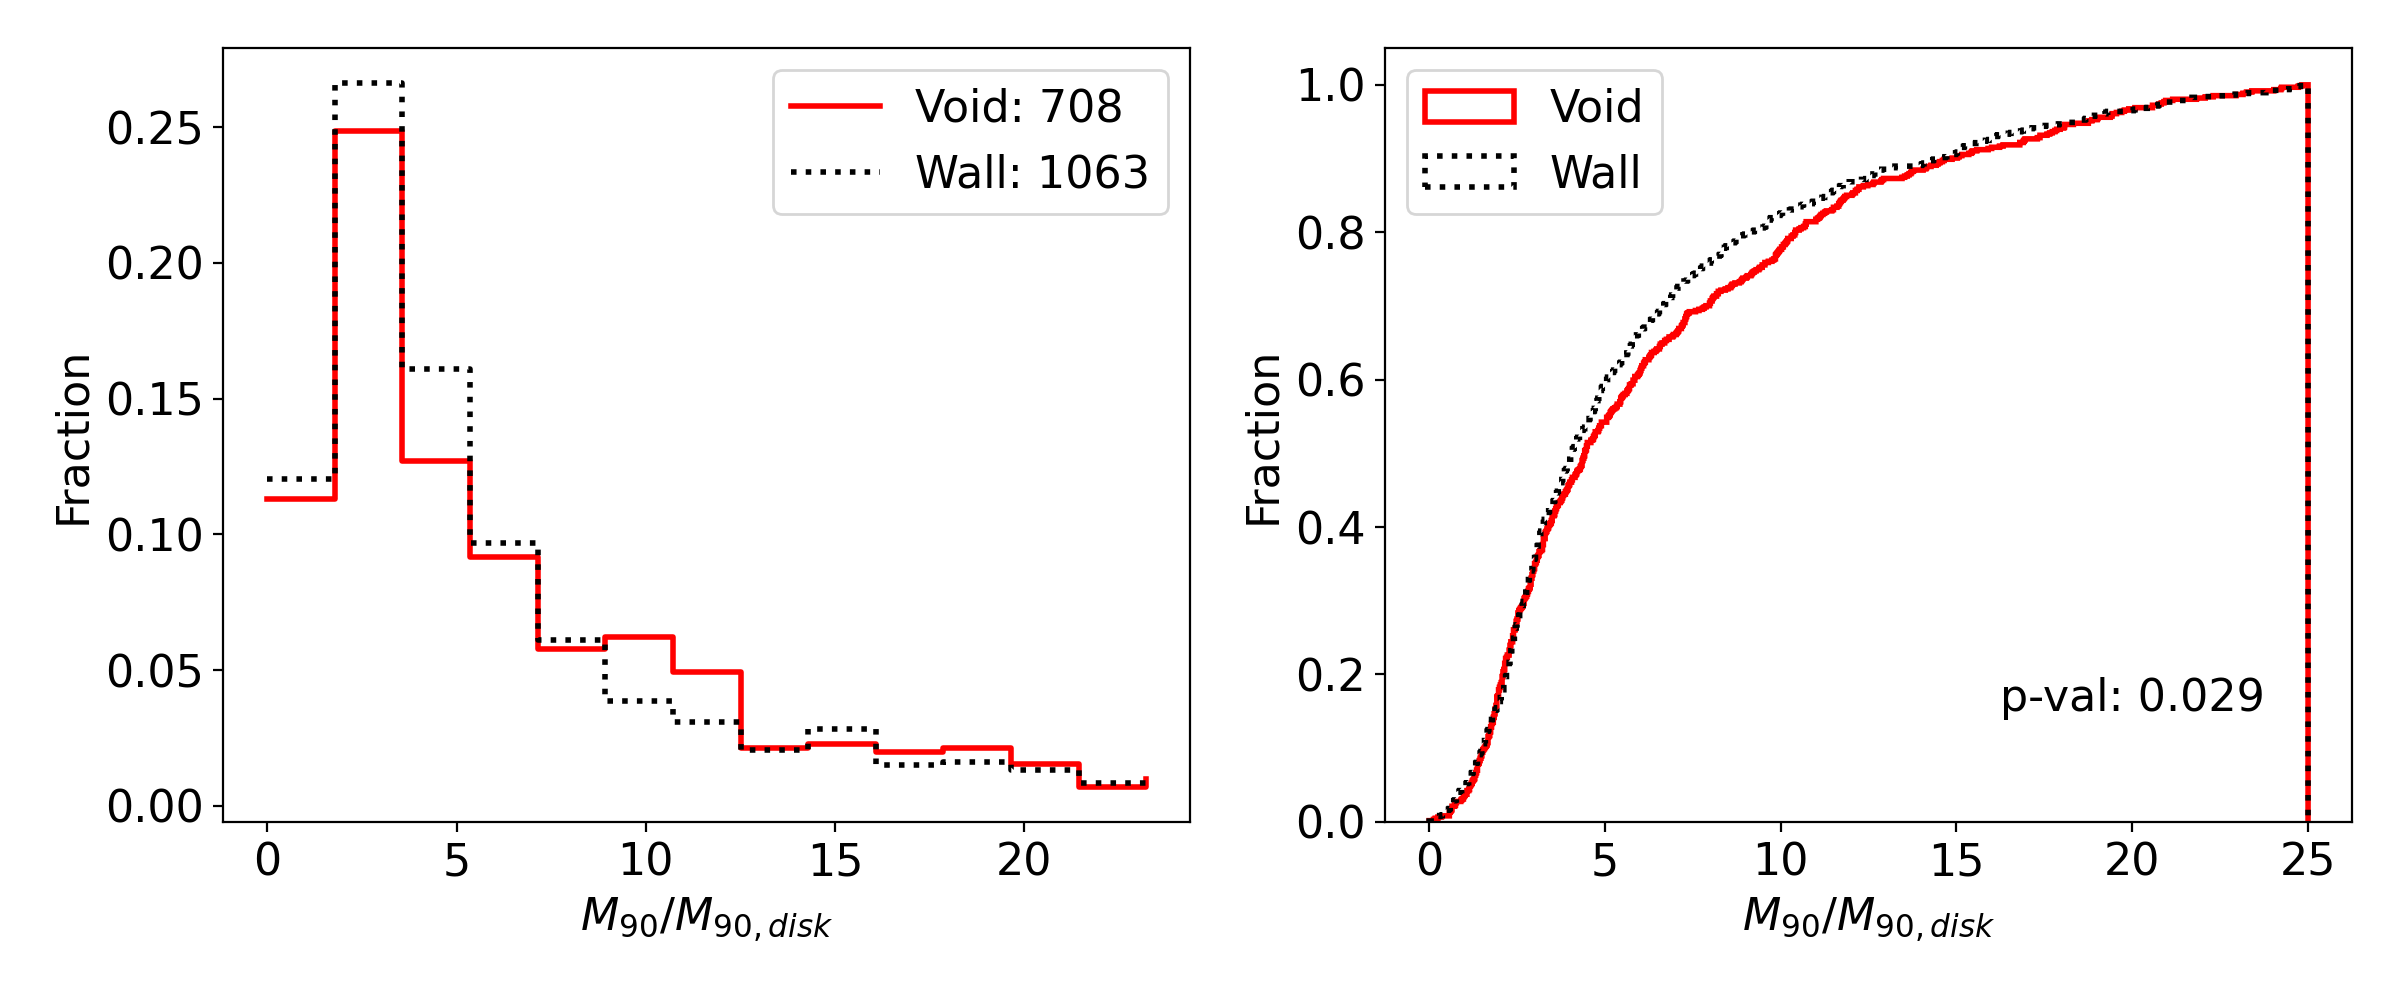

In [6]:
ratio_bins = np.linspace(0,25,15)

plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals, wall_gals, 'M90_Mdisk_ratio', ratio_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals, wall_gals, 'M90_Mdisk_ratio', (0,25))

plt.tight_layout();

## $R_{turn}$

<IPython.core.display.Javascript object>


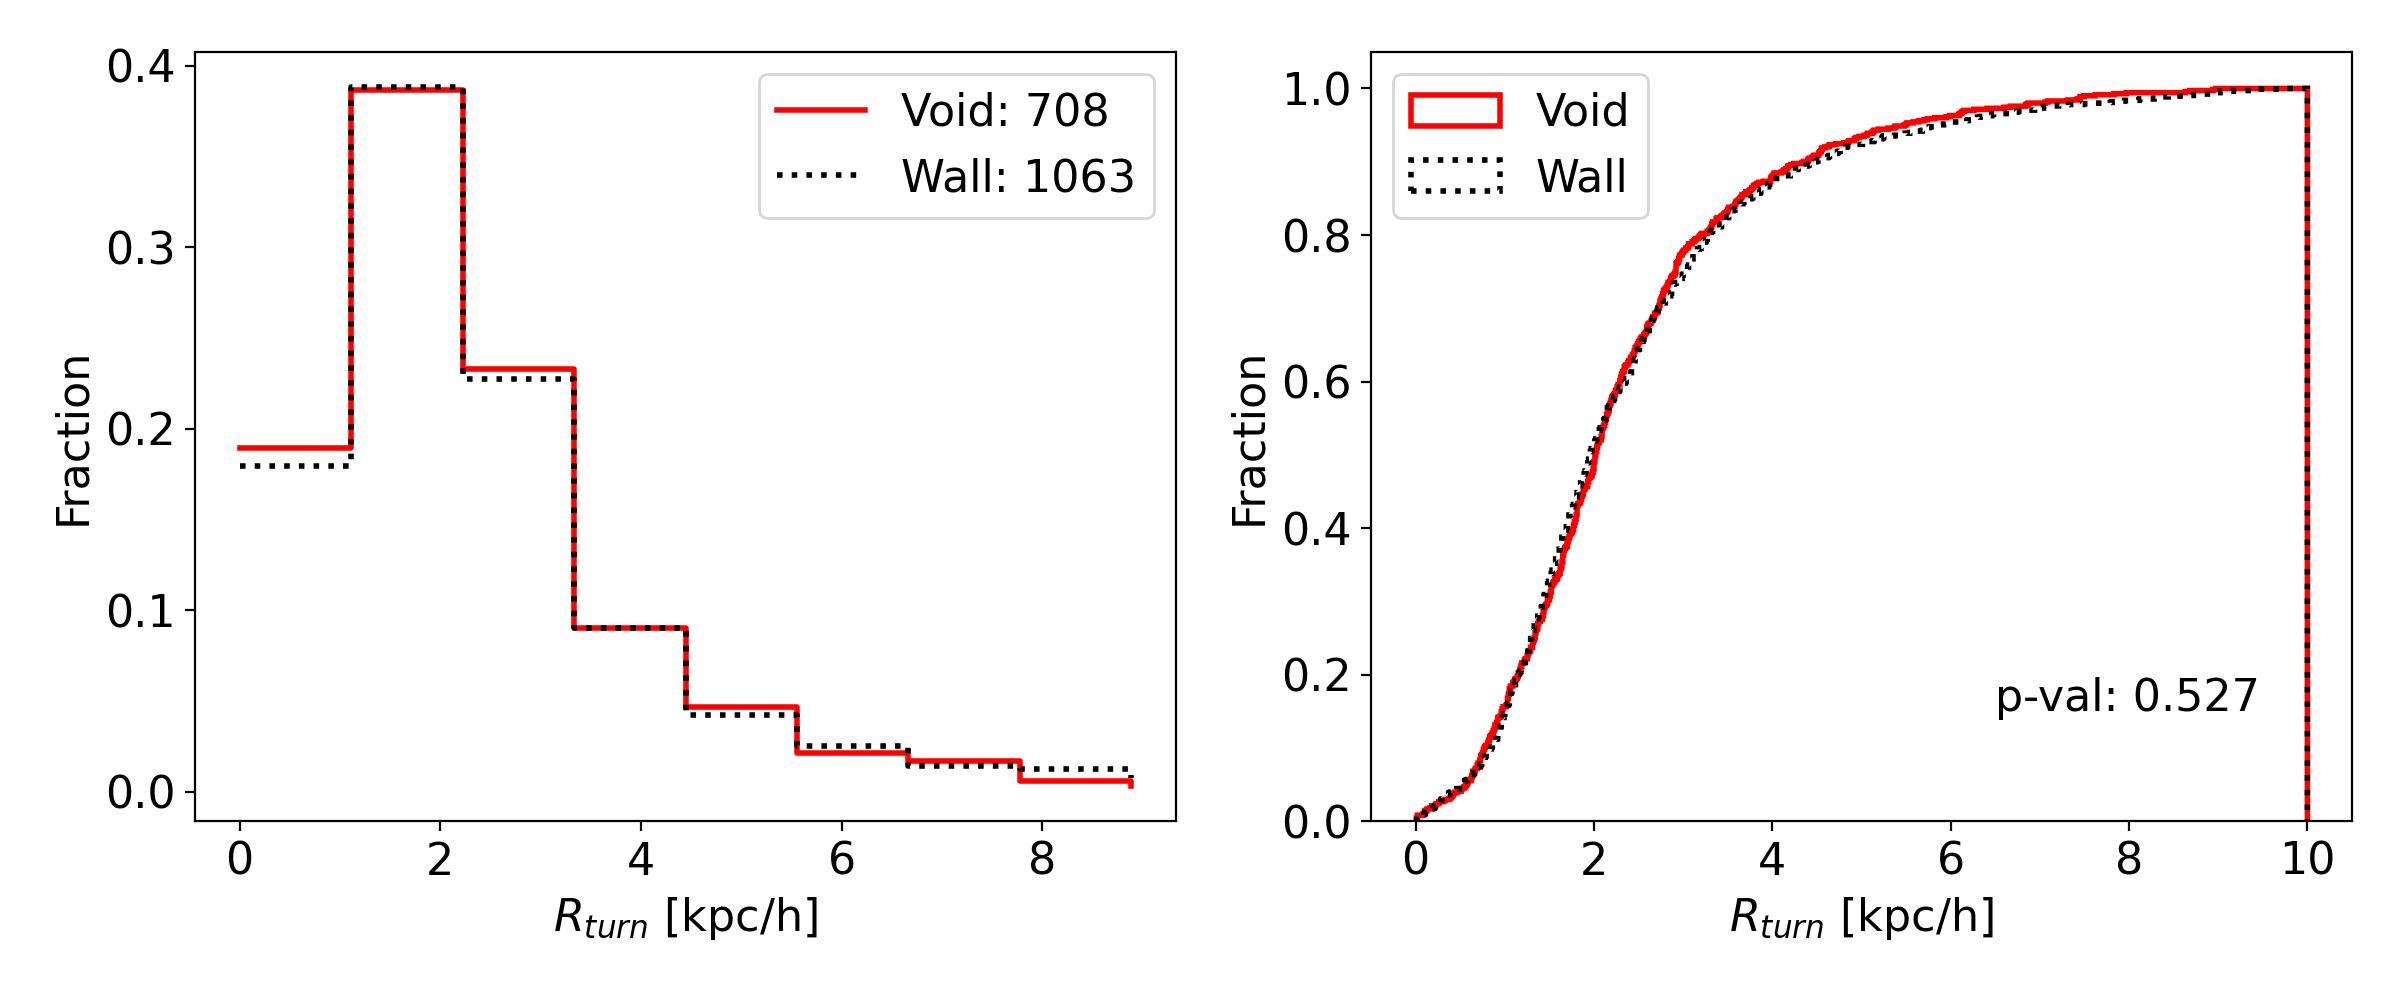

In [7]:
Rturn_bins = np.linspace(0,10,10)

plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals, wall_gals, 'Rturn_map', Rturn_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals, wall_gals, 'Rturn_map', (0,10))

plt.tight_layout();

## $R_{disk}$

<IPython.core.display.Javascript object>


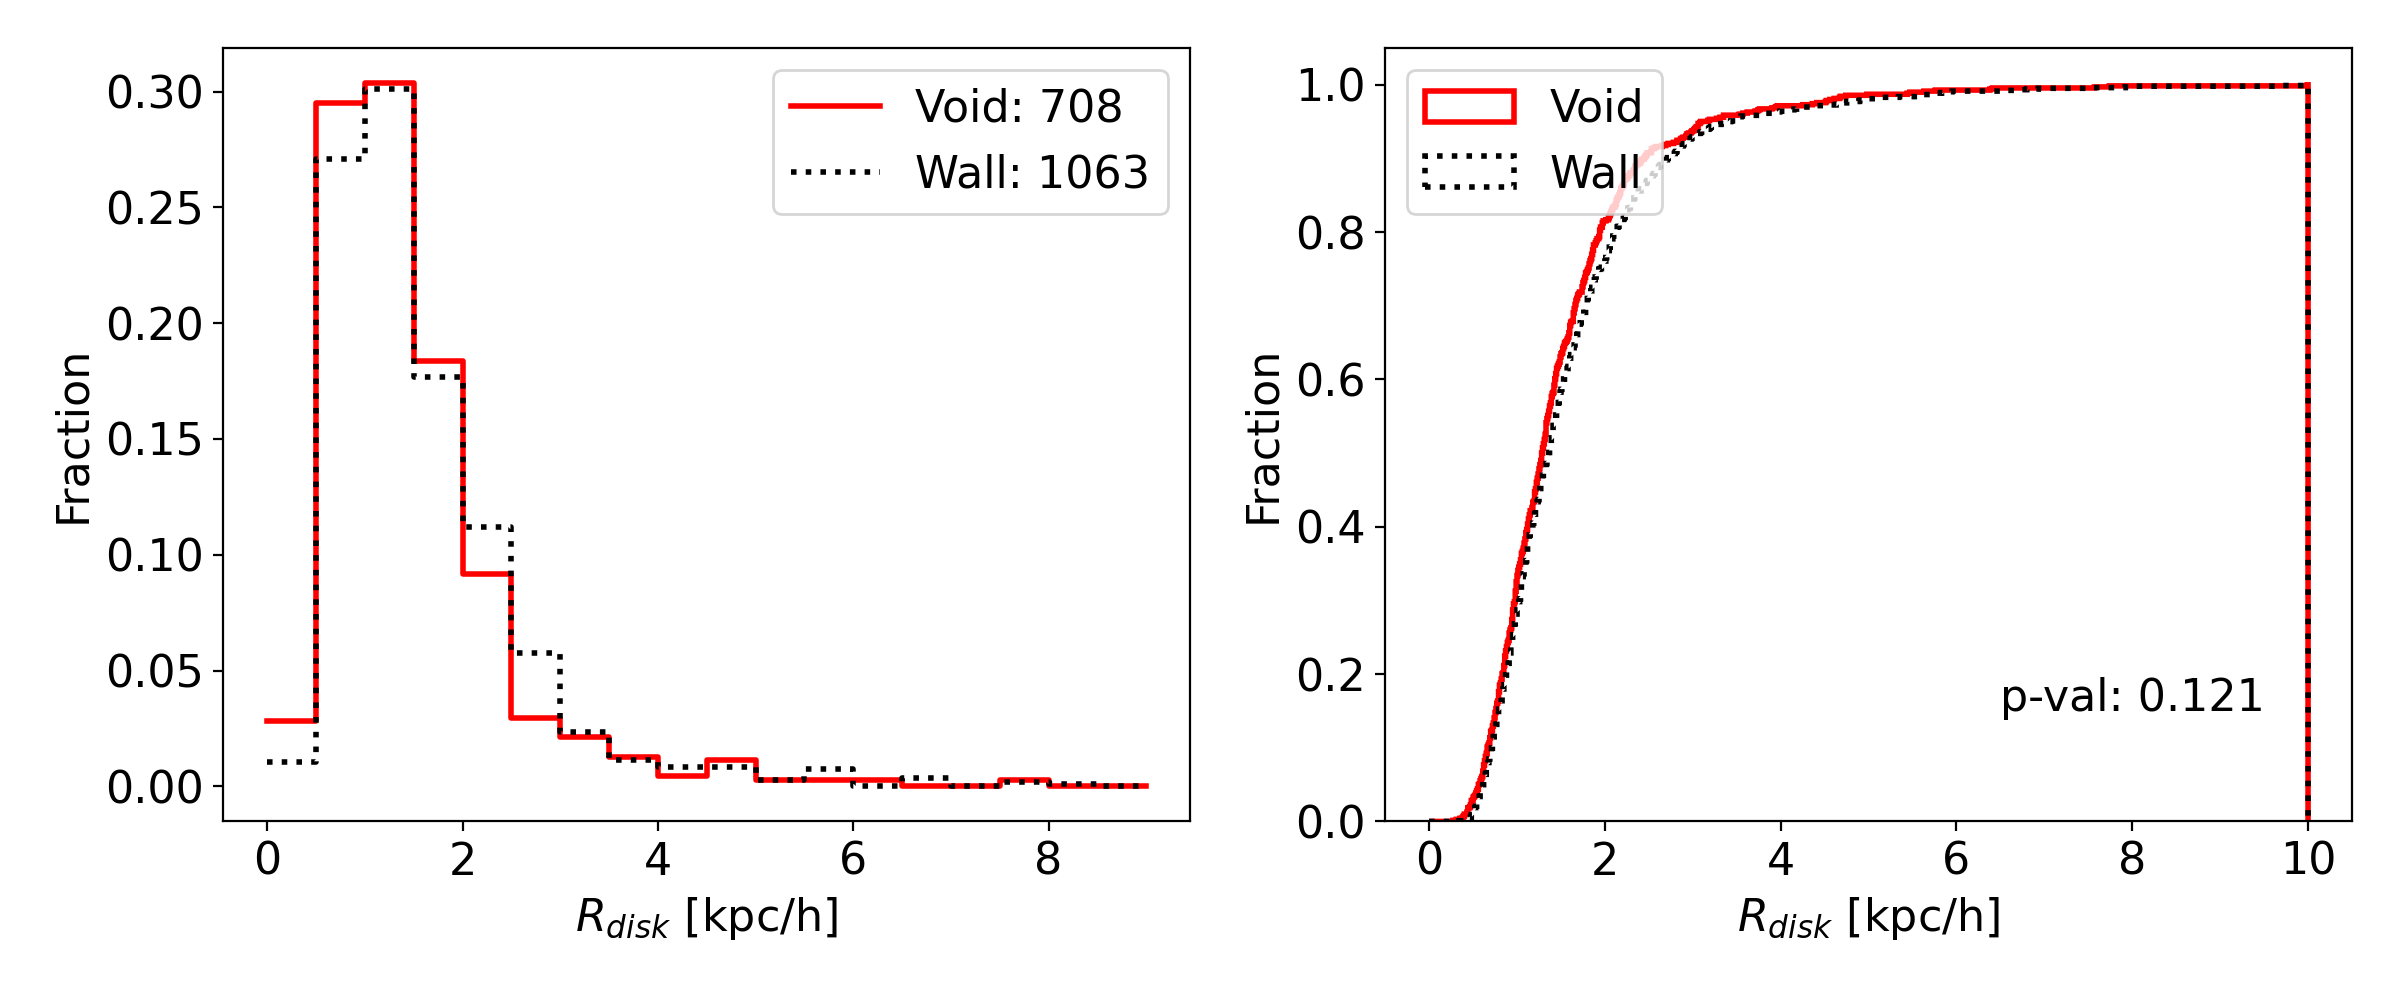

In [21]:
Rdisk_bins = np.arange(0,10,0.5)

plt.figure(figsize=(12,5))

# histogram
plt.subplot(121)
param_hist(void_gals, wall_gals, 'Rdisk_map', Rdisk_bins)


# CDF
plt.subplot(122)
param_CDF(void_gals, wall_gals, 'Rdisk_map', (0,10))

plt.tight_layout();

## Relationship between $R_{disk}$ and $M_{90}$

https://arxiv.org/abs/2010.03742 suggests that void galaxies should have a larger disk scale radius for a fixed mass.

<IPython.core.display.Javascript object>


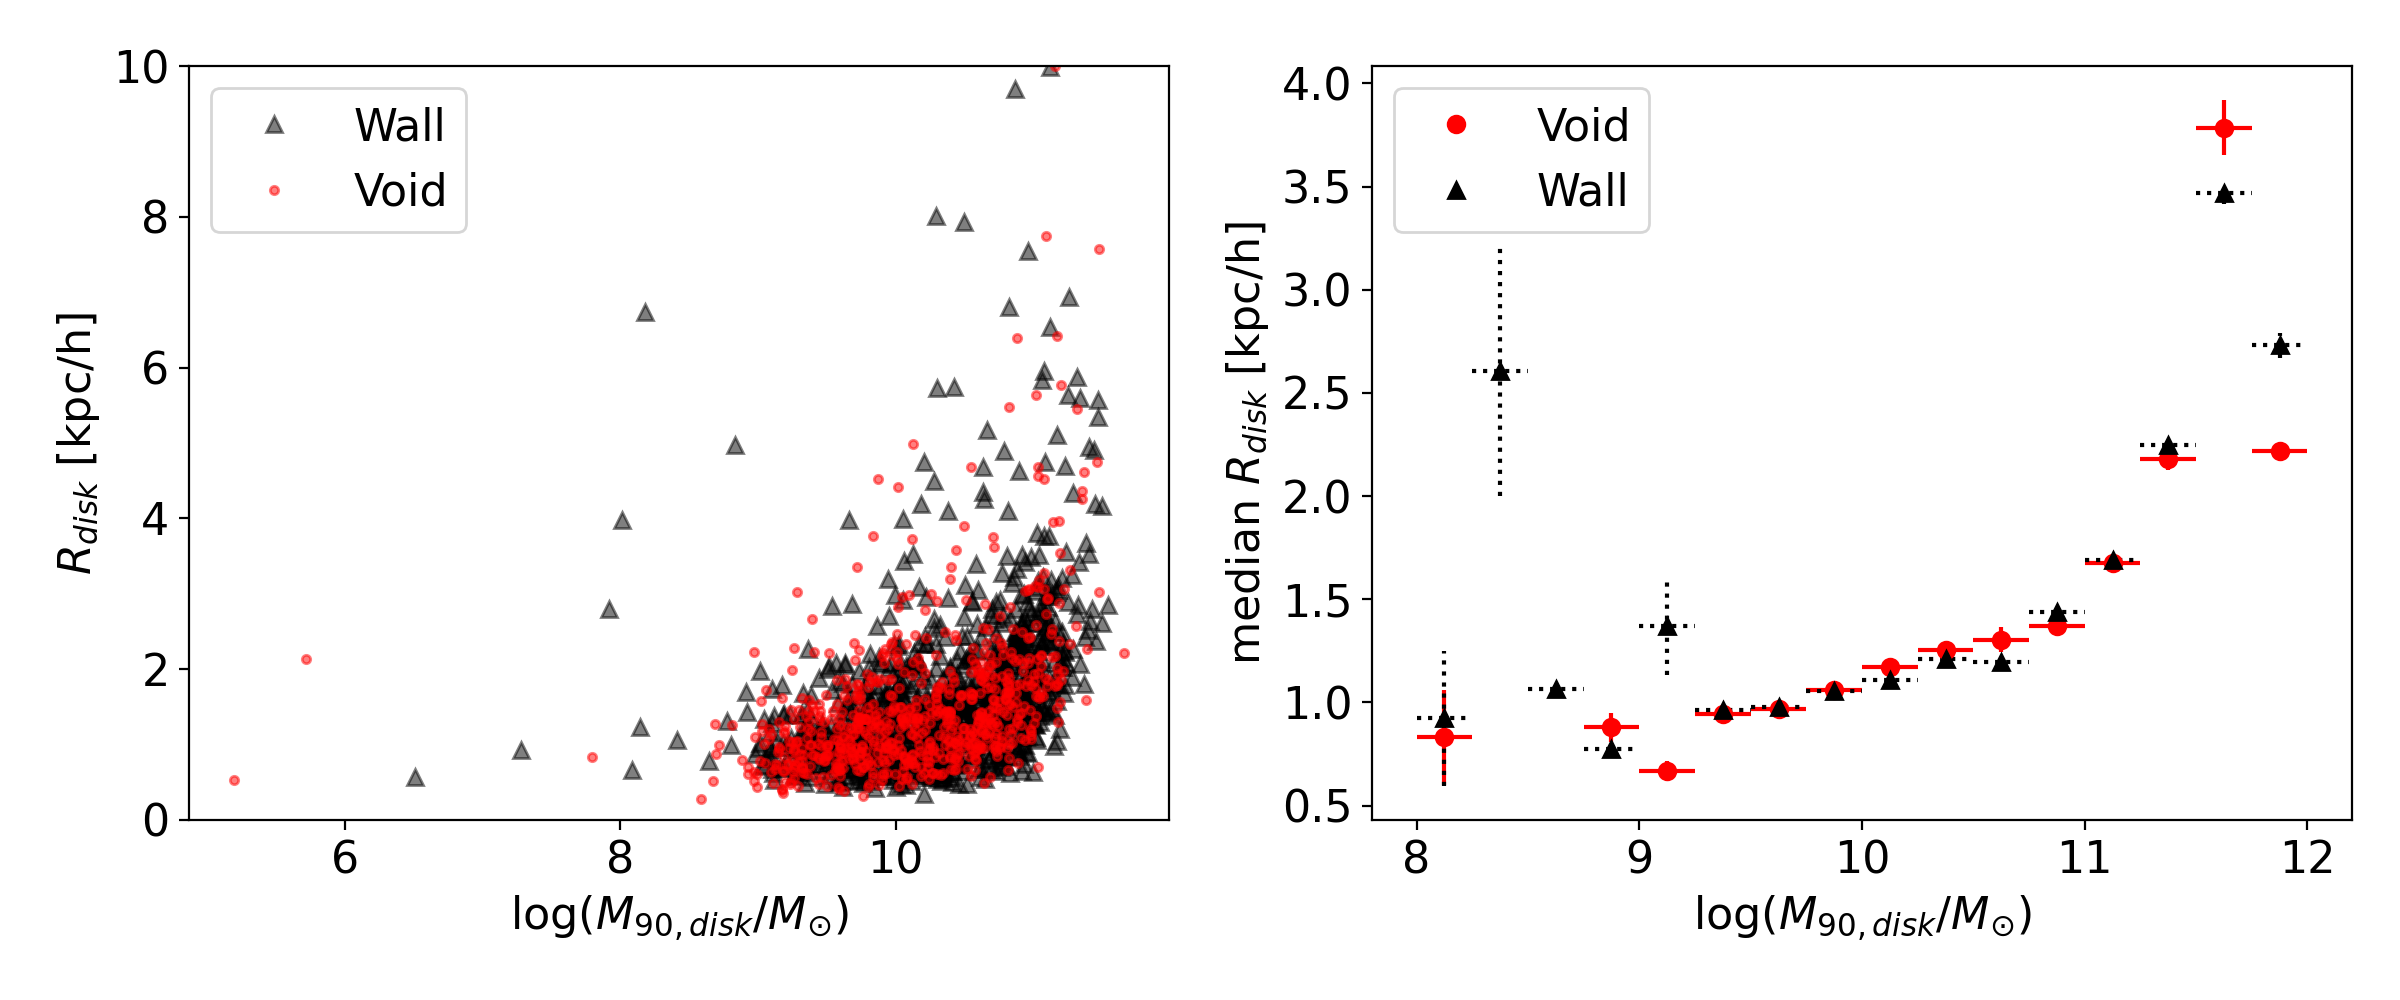

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_disk_map'], wall_gals['Rdisk_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_disk_map'], void_gals['Rdisk_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90,disk}/M_{\odot}$)')
plt.ylabel('$R_{disk}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_disk_map', 'Rdisk_map', np.arange(8,12,0.25))

plt.tight_layout();

<IPython.core.display.Javascript object>


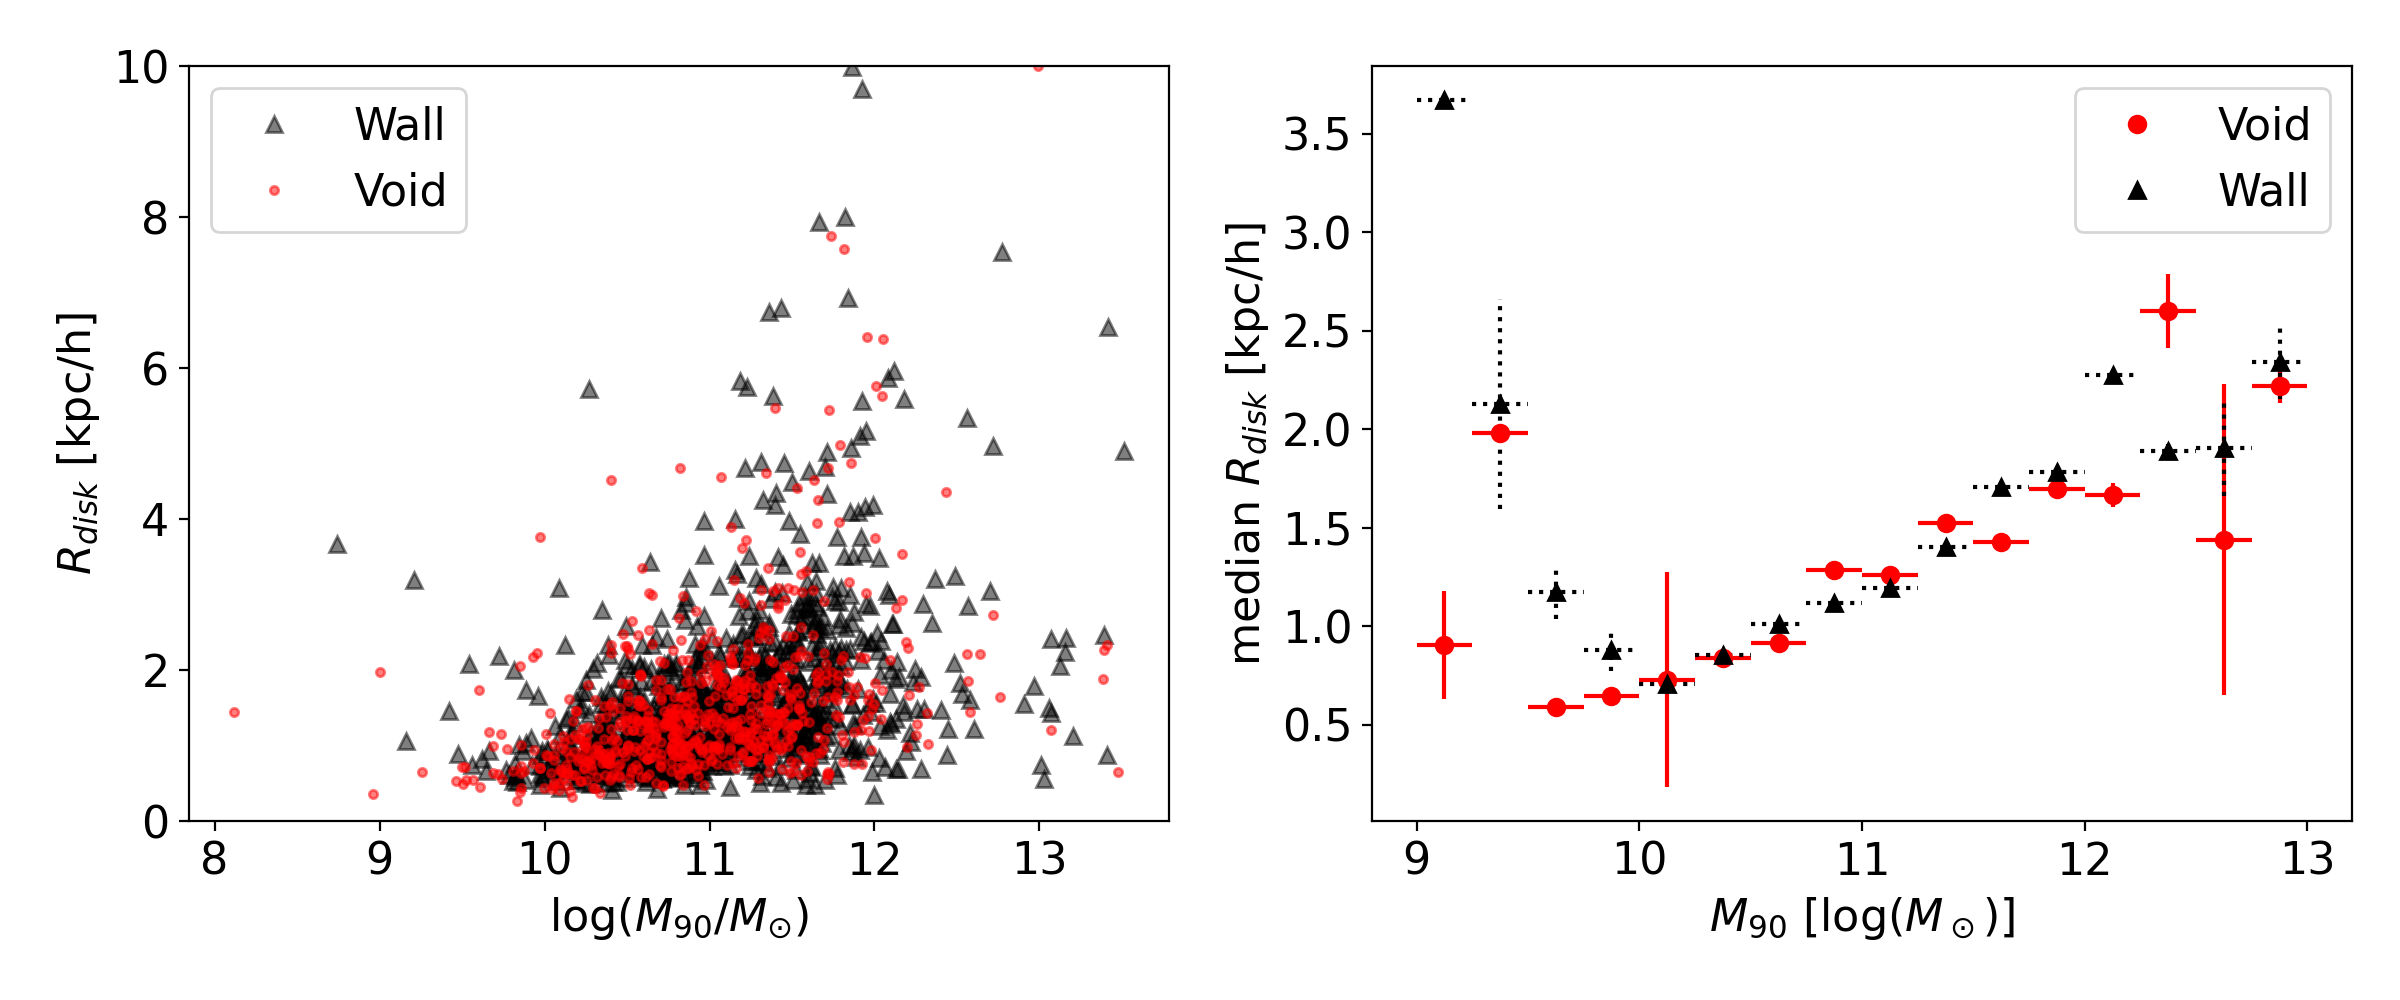

In [11]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_map'], wall_gals['Rdisk_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_map'], void_gals['Rdisk_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90}/M_{\odot}$)')
plt.ylabel('$R_{disk}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_map', 'Rdisk_map', np.arange(9,13,0.25))

plt.tight_layout();

## Relationship between $R_{turn}$ and $M_{90}$

<IPython.core.display.Javascript object>


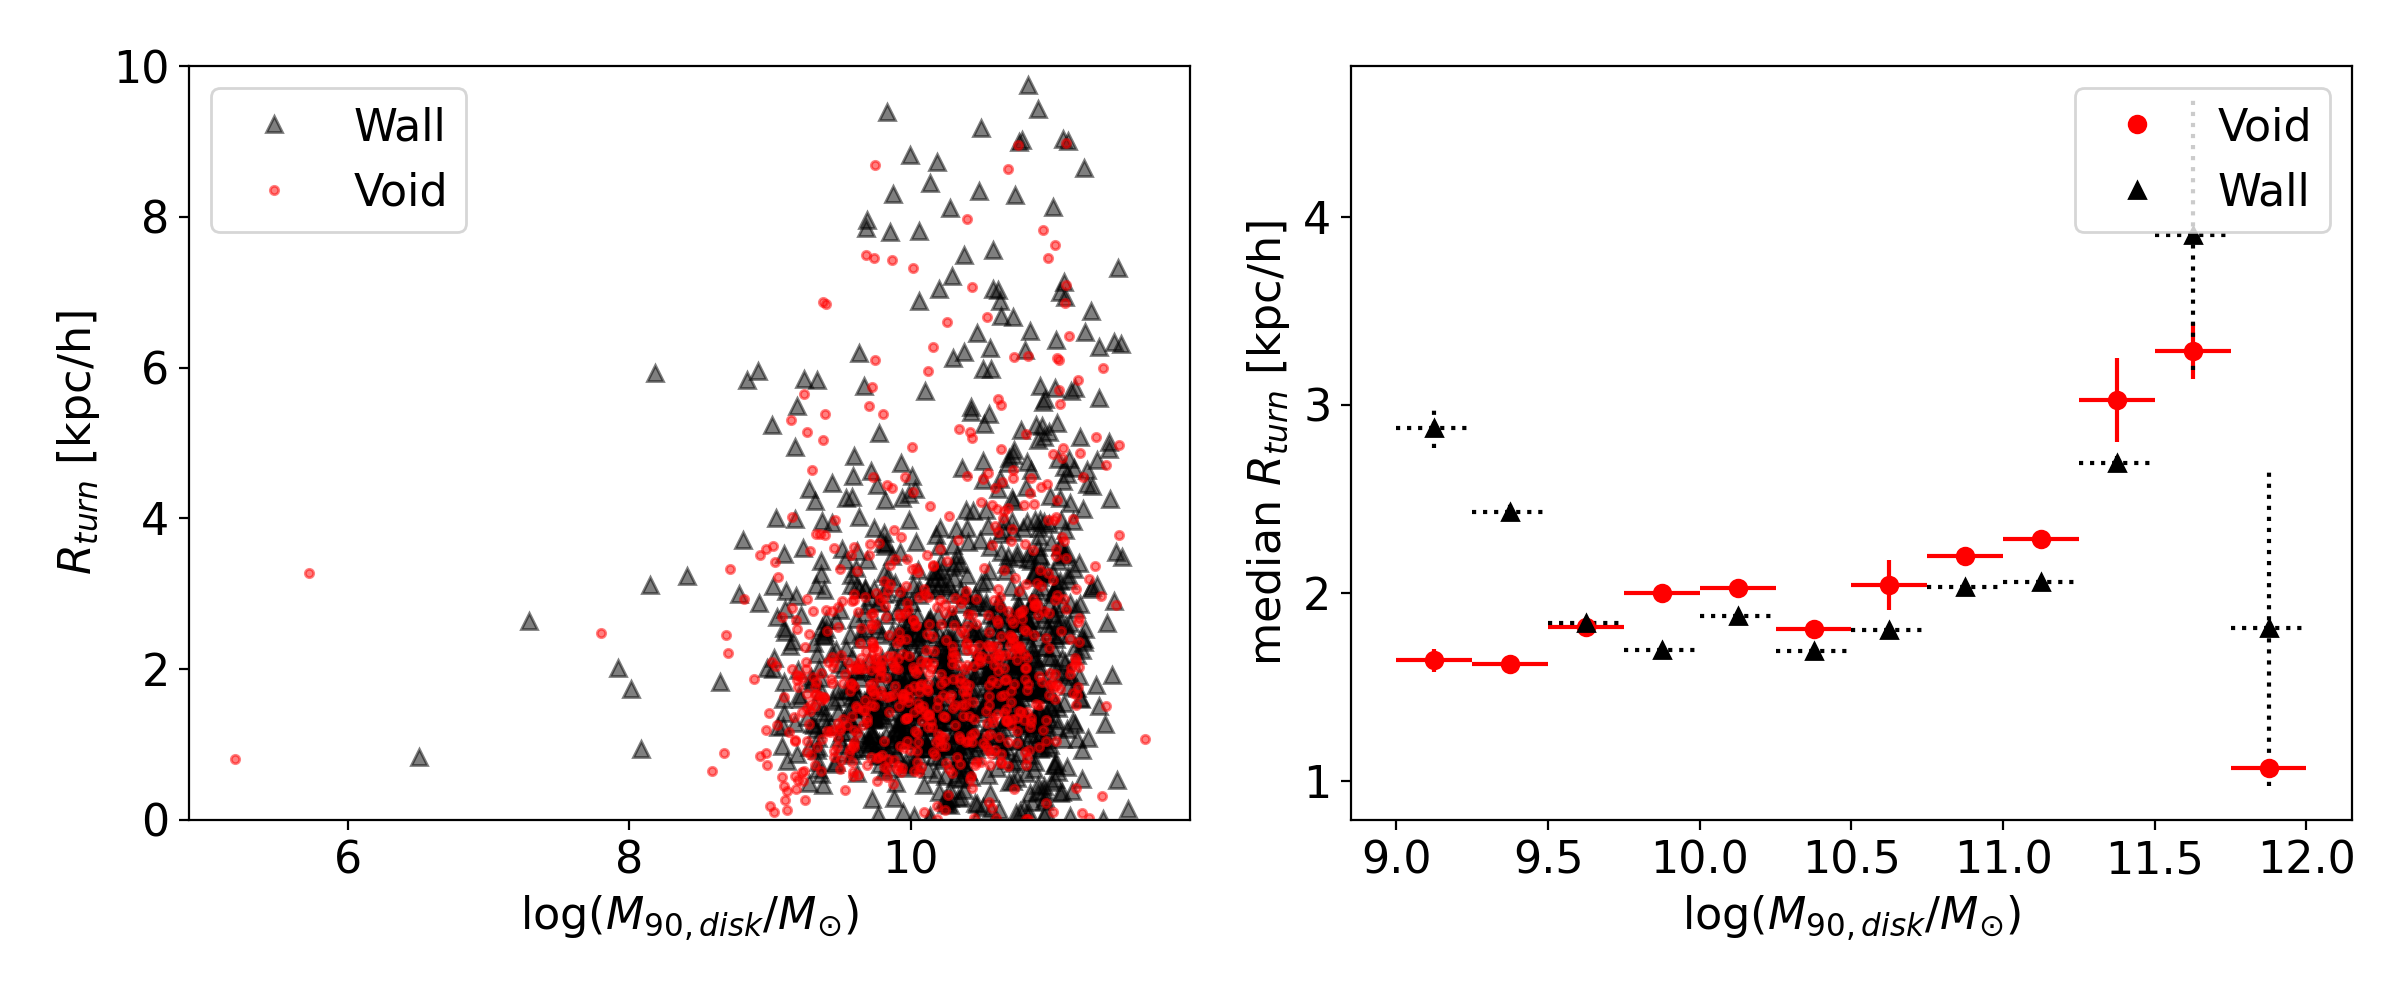

In [13]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_disk_map'], wall_gals['Rturn_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_disk_map'], void_gals['Rturn_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90,disk}/M_{\odot}$)')
plt.ylabel('$R_{turn}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_disk_map', 'Rturn_map', np.arange(9,12,0.25))

plt.tight_layout();

<IPython.core.display.Javascript object>


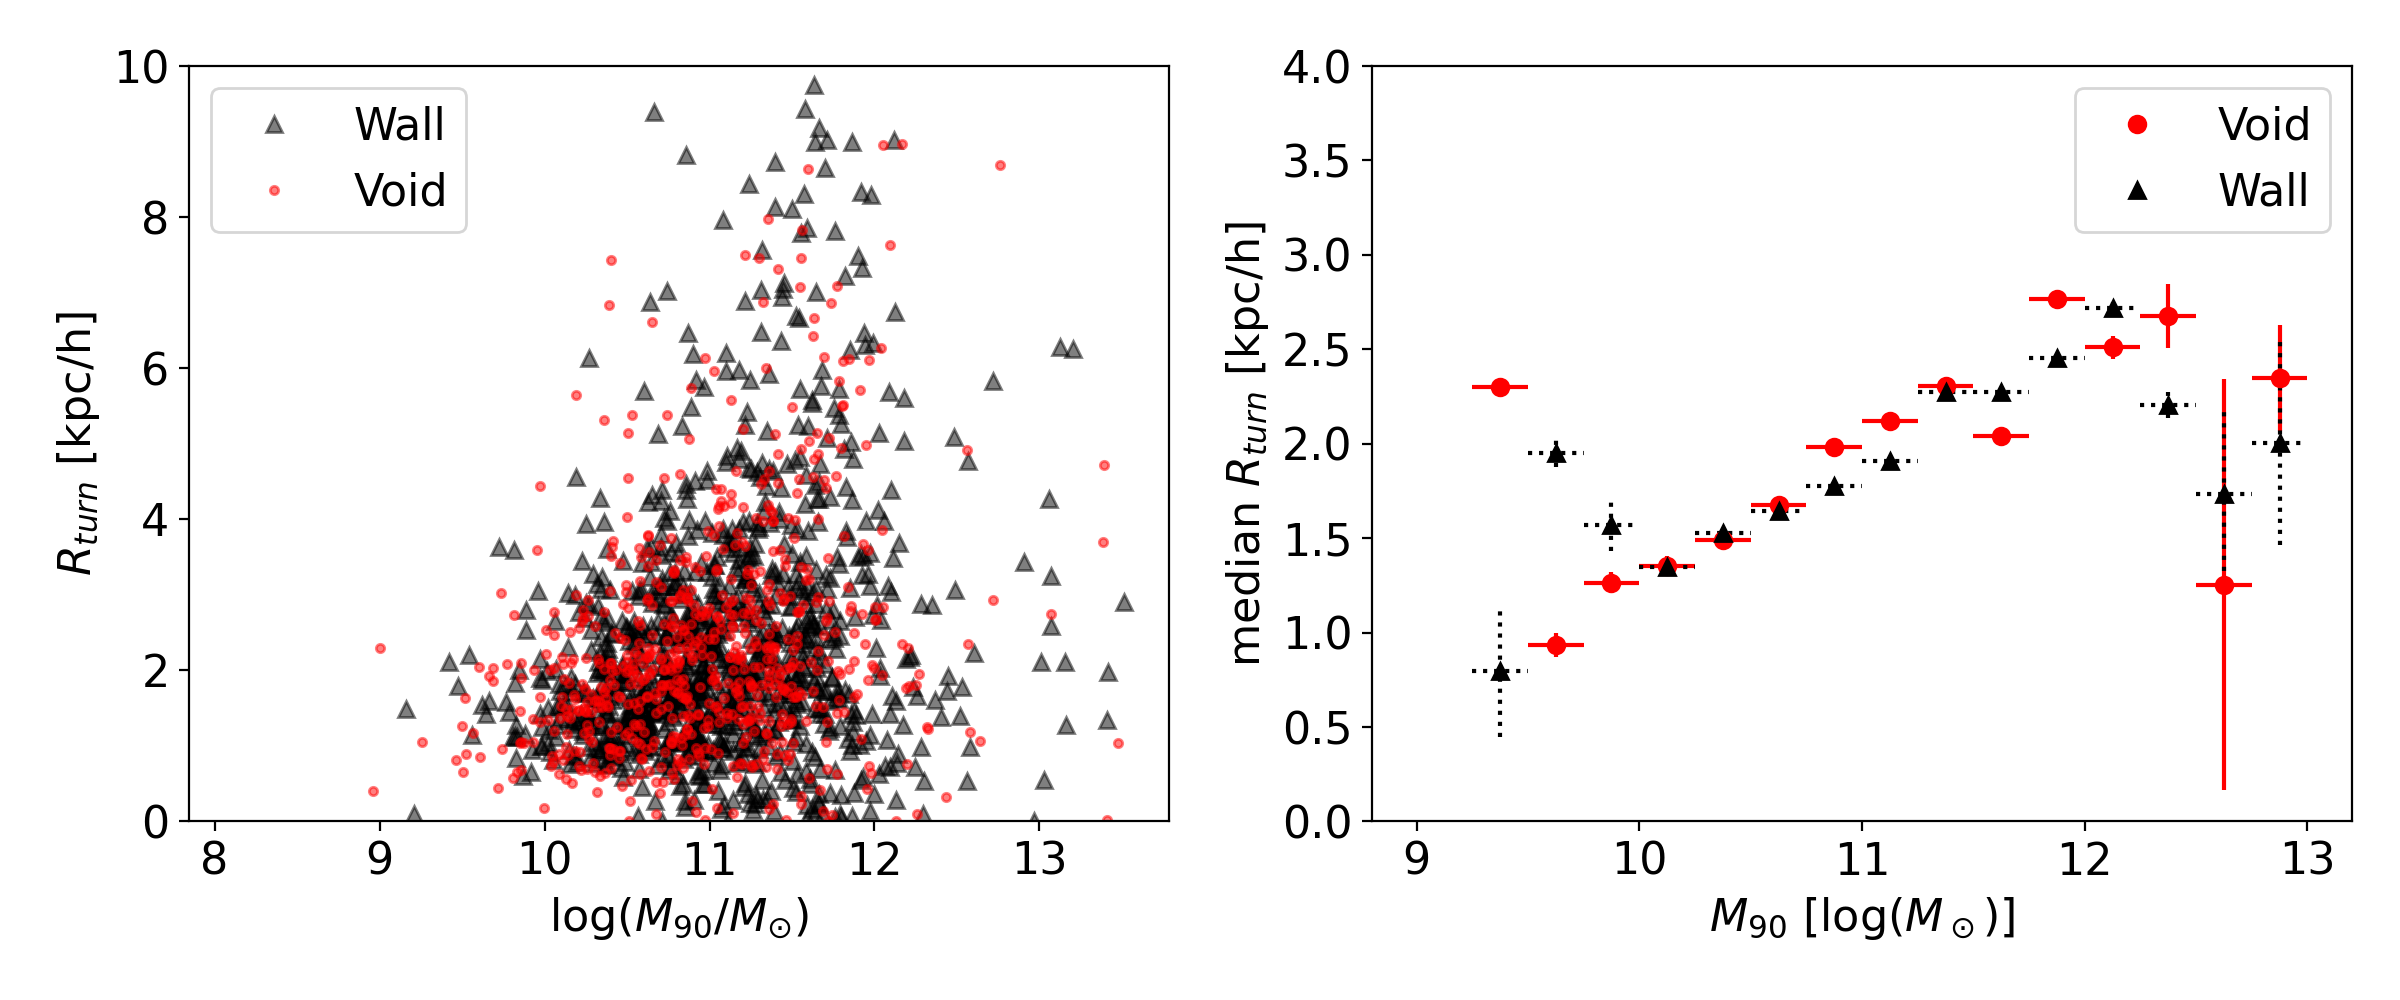

In [17]:
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(wall_gals['M90_map'], wall_gals['Rturn_map'], 'k^', alpha=0.5, label='Wall')
plt.plot(void_gals['M90_map'], void_gals['Rturn_map'], 'r.', alpha=0.5, label='Void')

plt.ylim([0,10])

plt.xlabel('log($M_{90}/M_{\odot}$)')
plt.ylabel('$R_{turn}$ [kpc/h]')

plt.legend()


plt.subplot(122)
median_hist(void_gals, wall_gals, 'M90_map', 'Rturn_map', np.arange(9,13,0.25))

plt.ylim([0,4])

plt.tight_layout();